# *******  Lane detection using Hough Line Transform and Canny edge ***********

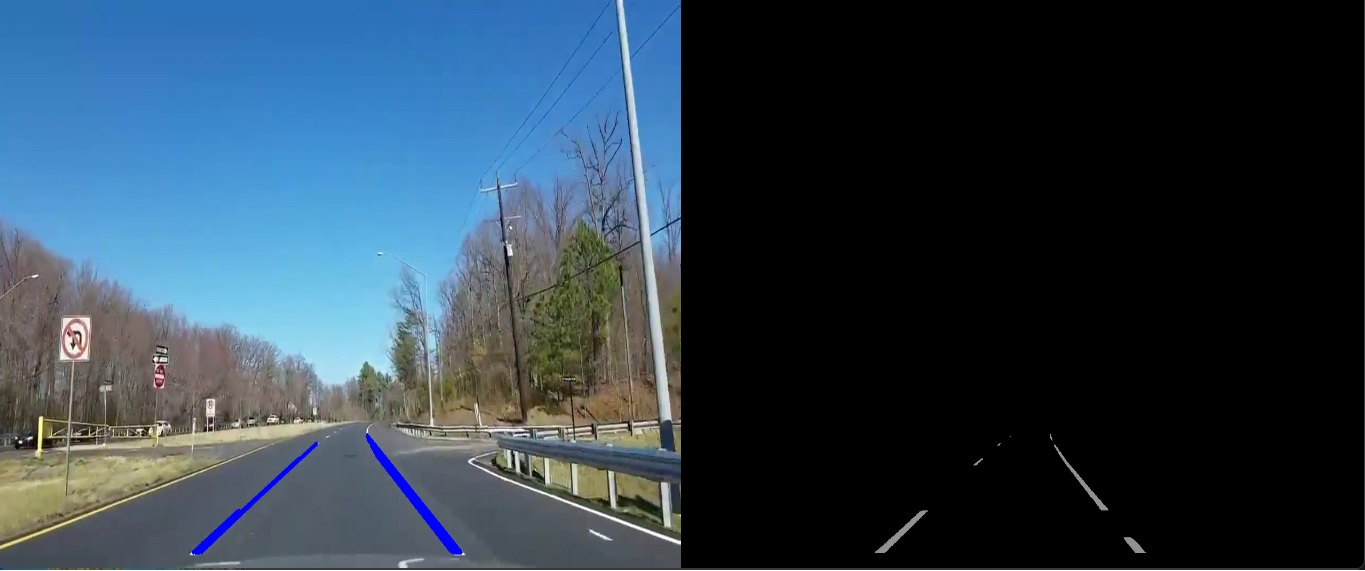

# Step 1: Importing required Libraries

In [1]:
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from time import sleep
import glob
import os

# Step 2: User defined variables

In [2]:
frames_folder_name = "data"
img_format = "jpg"
video_name = 'video.mp4'

# Step 3: Video to frames

In [3]:

frames_user = 148

vidcap = cv2.VideoCapture(video_name)
frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
video_len = int(frames / fps)


cwd = os.getcwd()
directory = cwd + "\data"
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    
    try:
        os.chdir(directory)
    except FileNotFoundError:
        os.makedirs(directory)
        os.chdir(directory)
   
   
    if hasFrames:
        cv2.imwrite(str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0

 #formulae for framce
    
threshold = video_len/frames_user   
frameRate = threshold #//it will capture image in each 0.5 second
count = "0001"
count = int(count)
success = getFrame(sec)
while success:
    count = count + 1
    if count == frames_user + 1:
        break
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
os.chdir(cwd)
    

# Step 4: Importing frames 

In [13]:
cwd = os.getcwd()
directory = cwd + "\\" + frames_folder_name
cwd_len = len(directory) 
img_dir = directory # Enter Directory of all images 
data_path = os.path.join(img_dir, "*." + img_format) 

img_files = glob.glob(data_path)
img_files = sorted(img_files, key=lambda name: int(name[cwd_len+1:-4]))
col_images_list = img_files
total_files = len(img_files)

In [14]:

# load frames
col_images=[]
for i in tqdm_notebook(col_images_list):
    img = cv2.imread(i)
    col_images.append(img)

c:\users\aadit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/148 [00:00<?, ?it/s]

# Step 5: Visualize Gray frame

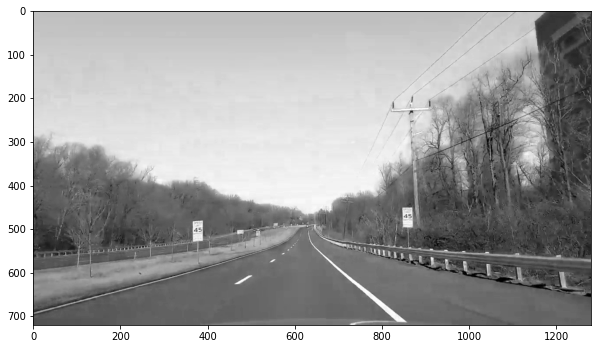

In [16]:
# specify frame index
idx = 11

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

# Step 6: Initializing empty rectangle or region of interest ROI

In [17]:
# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[250,700], [550,550], [700,550], [900,700]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

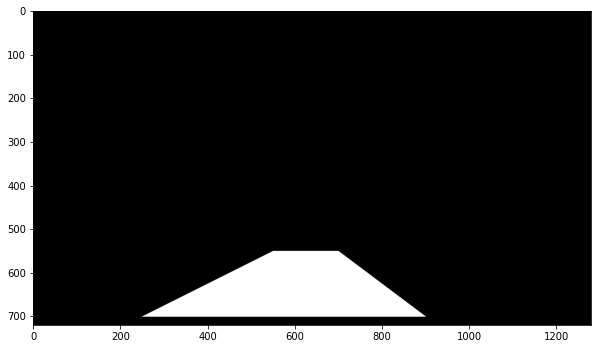

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

# Step 7: Visualizing region of interest

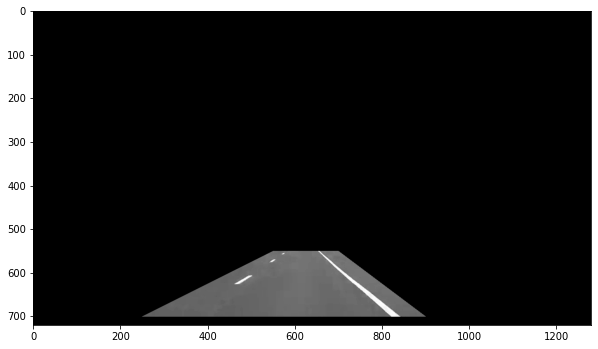

In [19]:
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

# Step 8: Applying Edge detection or canny detection 

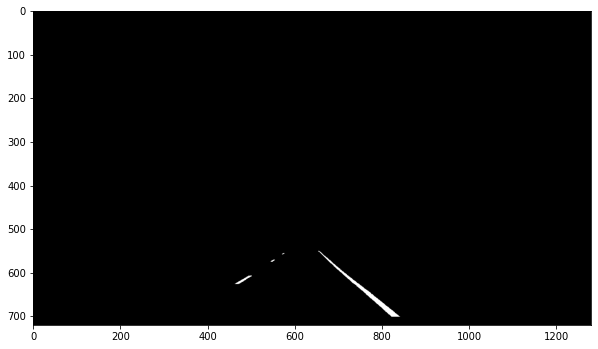

In [20]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 200, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

# Step 9: Applying and drawing houghlines function

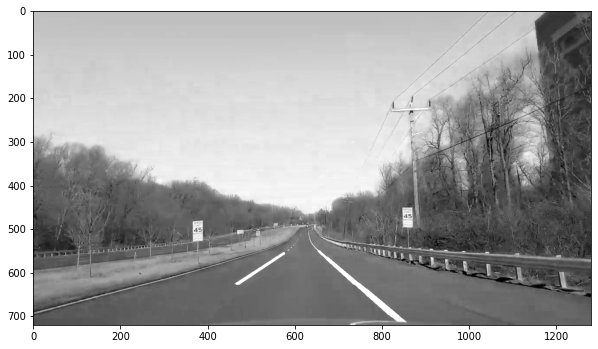

In [21]:
#cv2.HoughLinesP(image,rho, theta, threshold, np.array ([ ]), minLineLength=xx, maxLineGap=xx)

# The Hough Line Transform is a transform used to detect straight lines.
# To apply the Transform, first an edge detection pre-processing is desirable.

# edges: Output of the edge detector.
# lines: A vector to store the coordinates of the start and end of the line.
# rho: The resolution parameter \rho in pixels.
# theta: The resolution of the parameter \theta in radians.
# threshold: The minimum number of intersecting points to detect a line.


lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

# Step 10: Iterating the process to each frame

In [22]:
cv2.namedWindow("Lane-detection")
for f1 in range(len(col_images)):
   
    frame = col_images[f1]
    
     # apply frame mask
    masked = cv2.bitwise_and(frame[:,:,0], frame[:,:,0], mask=stencil)

    # apply image thresholding
    ret, thresh = cv2.threshold(masked, 200, 145, cv2.THRESH_BINARY)

    # apply Hough Line Transformation
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=300)
    dmy = frame.copy()

    # Plot detected lines
  
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
 

    # Convert grayscale image to 3-channel image,so that they can be stacked together    
    edge = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)
    combined = np.concatenate((dmy,edge), axis=1)
    combined = cv2.resize(combined, (1366, 568))  

    sleep(0.05)
    cv2.imshow('Lane-detection',combined)
    k = cv2.waitKey(2) & 0xff 

    if k == 27:
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()


# Export installed environment to run on multiple domains

In [39]:
# creates requirements.txt file
!pip freeze > requirements.txt  # Python3